# Tutorial 3 - Dummy Variables & One Hot Encoding

In statistics, especially in regression models, we deal with various kinds of data. The data may be quantitative (numerical) or qualitative (categorical). The numerical data can be easily handled in regression models but we can’t use categorical data directly, it needs to be transformed in some way.

For transforming categorical attributes to numerical attributes, we can use the **label encoding** procedure (label encoding assigns a unique integer to each category of data). But this procedure is not alone that suitable, hence, **One hot encoding** is used in regression models following label encoding. This enables us to create new attributes according to the number of classes present in the categorical attribute *i.e* if there are n number of categories in categorical attribute, n new attributes will be created. These attributes created are called **Dummy Variables**. Hence, dummy variables are “proxy” variables for categorical data in regression models.

**These dummy variables will be created with one-hot encoding and each attribute will have a value of either 0 or 1, representing the presence or absence of that attribute.**

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load data set

In [164]:
df1 = pd.read_csv("3-car-price.csv")
df1

,Car Model,Mileage,Age,Price
0,BMW,69000,6,18000
1,BMW,35000,3,34000
2,BMW,57000,5,26100
3,BMW,22500,2,40000
4,BMW,46000,4,31500
5,Volvo,59000,5,29400
6,Volvo,52000,5,32000
7,Volvo,72000,6,19300
8,Volvo,91000,8,12000
9,Toyota,67000,6,22000


In [165]:
# To get clean labels, we can either
# - 1. using assgin each column with binary numbers either 0 or 1 
#    - which can be achieved using `get_dummies` function
# - 2. assigning `bmw=0`, `volvo=2`, and `toyota=1`
#    - which can be achieved using one hot encoding method

### 2. Using `get_dummies` function in Pandas

In [166]:
# we first use `get_dummies` function in pandas to achieve this.
car_model_dummy_columns = pd.get_dummies(df1["Car Model"]) # or `df1.Age`

In [167]:
print(car_model_dummy_columns)

    BMW  Toyota  Volvo
0     1       0      0
1     1       0      0
2     1       0      0
3     1       0      0
4     1       0      0
5     0       0      1
6     0       0      1
7     0       0      1
8     0       0      1
9     0       1      0
10    0       1      0
11    0       1      0
12    0       1      0


In [168]:
# next we should join the dummy columns to original data set.

df2 = pd.concat([df1, car_model_dummy_columns], axis="columns")
print(df2)

   Car Model  Mileage  Age  Price  BMW  Toyota  Volvo
0        BMW    69000    6  18000    1       0      0
1        BMW    35000    3  34000    1       0      0
2        BMW    57000    5  26100    1       0      0
3        BMW    22500    2  40000    1       0      0
4        BMW    46000    4  31500    1       0      0
5      Volvo    59000    5  29400    0       0      1
6      Volvo    52000    5  32000    0       0      1
7      Volvo    72000    6  19300    0       0      1
8      Volvo    91000    8  12000    0       0      1
9     Toyota    67000    6  22000    0       1      0
10    Toyota    83000    7  20000    0       1      0
11    Toyota    79000    7  21000    0       1      0
12    Toyota    59000    5  33000    0       1      0


In [169]:
# now we don't need the `car model` column
# therefore it can be dropped from the data frame.

df3 = df2.drop(["Car Model"], axis="columns")
print(df3)

    Mileage  Age  Price  BMW  Toyota  Volvo
0     69000    6  18000    1       0      0
1     35000    3  34000    1       0      0
2     57000    5  26100    1       0      0
3     22500    2  40000    1       0      0
4     46000    4  31500    1       0      0
5     59000    5  29400    0       0      1
6     52000    5  32000    0       0      1
7     72000    6  19300    0       0      1
8     91000    8  12000    0       0      1
9     67000    6  22000    0       1      0
10    83000    7  20000    0       1      0
11    79000    7  21000    0       1      0
12    59000    5  33000    0       1      0


### 3. Data visualizatioin

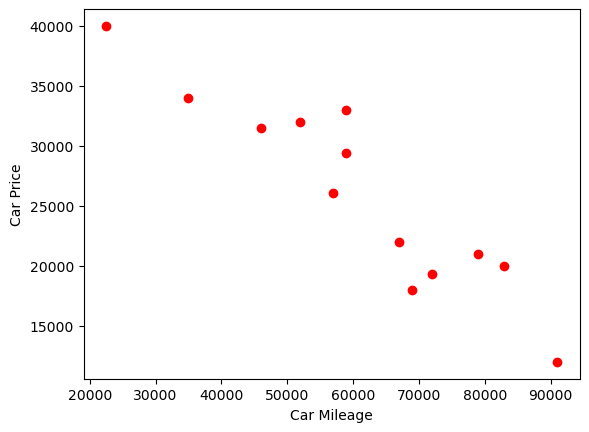

In [170]:
%matplotlib inline
# x = df3.Mileage
# y = df3.Price

plt.xlabel("Car Mileage")
plt.ylabel("Car Price")

plt.plot(df3.Mileage, df3.Price,'ro')
plt.show()

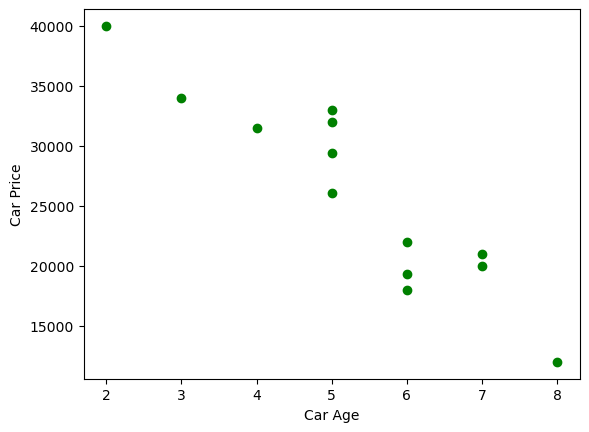

In [171]:
plt.xlabel("Car Age")
plt.ylabel("Car Price")
plt.plot(df3.Age, df3.Price,'go')
plt.show()

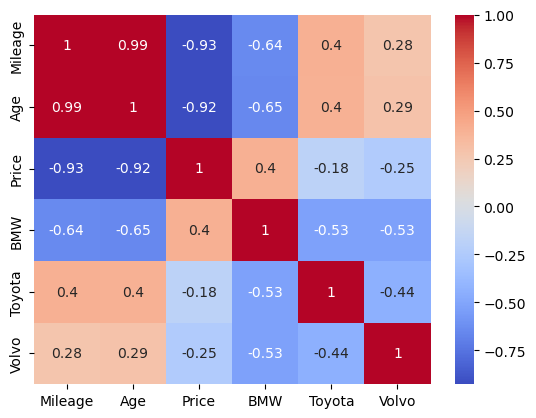

In [172]:
# import seaborn as sns
# plt.figure(figsize=(9,6))
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True)
plt.show()

### 4. Linear regression

In [173]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [174]:
x = df3.drop(["Price"], axis="columns")
print(x)

    Mileage  Age  BMW  Toyota  Volvo
0     69000    6    1       0      0
1     35000    3    1       0      0
2     57000    5    1       0      0
3     22500    2    1       0      0
4     46000    4    1       0      0
5     59000    5    0       0      1
6     52000    5    0       0      1
7     72000    6    0       0      1
8     91000    8    0       0      1
9     67000    6    0       1      0
10    83000    7    0       1      0
11    79000    7    0       1      0
12    59000    5    0       1      0


In [175]:
y = df3.Price # or df3["Price"]
print(y)

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64


In [176]:
model.fit(x,y)

LinearRegression()

In [177]:
# check the accuracy score of the model
model.score(x, y)

0.9417050937281083

In [178]:
# get all coefficients and intercept data

print(model.coef_) # Mileage  Age  BMW  Toyota  Volvo

print('\n', model.intercept_)

[-3.70122094e-01 -1.33245363e+03 -3.67429130e+03  3.06391602e+03
  6.10375284e+02]

 55912.70994756205


### Make new prediction

In [179]:
model.predict([[86000, 7, 1, 0, 0]]) # bmw, 86k miles, 7 years

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [180]:
model.predict([[50000, 3, 0, 0, 1]]) # volvo, 50k miles, 3 years

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34019.61962902])

In [181]:
model.predict([[45000, 4, 0, 1, 0]]) # toyota, 45k miles, 4 years

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

### Label data set with One Hot Encoding

In [182]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [183]:
df_label = df1
df_label.head(7)

,Car Model,Mileage,Age,Price
0,BMW,69000,6,18000
1,BMW,35000,3,34000
2,BMW,57000,5,26100
3,BMW,22500,2,40000
4,BMW,46000,4,31500
5,Volvo,59000,5,29400
6,Volvo,52000,5,32000


In [184]:
df_label["Car Model"] = label.fit_transform(df_label["Car Model"])
print(df_label_carModel)

[0 0 0 0 0 2 2 2 2 1 1 1 1]


In [185]:
print(df_label) # assigning `bmw=0`, `volvo=2`, and `toyota=1`

    Car Model  Mileage  Age  Price
0           0    69000    6  18000
1           0    35000    3  34000
2           0    57000    5  26100
3           0    22500    2  40000
4           0    46000    4  31500
5           2    59000    5  29400
6           2    52000    5  32000
7           2    72000    6  19300
8           2    91000    8  12000
9           1    67000    6  22000
10          1    83000    7  20000
11          1    79000    7  21000
12          1    59000    5  33000


In [186]:
x = df_label[["Car Model", "Mileage", "Age"]].values
x

array([[    0, 69000,     6],
       [    0, 35000,     3],
       [    0, 57000,     5],
       [    0, 22500,     2],
       [    0, 46000,     4],
       [    2, 59000,     5],
       [    2, 52000,     5],
       [    2, 72000,     6],
       [    2, 91000,     8],
       [    1, 67000,     6],
       [    1, 83000,     7],
       [    1, 79000,     7],
       [    1, 59000,     5]])

In [187]:
y = df_label.Price
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [188]:
model.fit(x, y)

LinearRegression()

In [195]:
model.score(x,y) # not consistent as before

0.8803425650559956

In [190]:
model.predict([[0, 86000, 7]]) # bmw, 86k miles, 7 years

array([14483.90274036])

In [191]:
model.predict([[1, 45000, 4]]) # toyota, 45k miles, 4 years

array([32828.0977381])

In [192]:
model.predict([[2, 50000, 3]]) # volvo, 50k miles, 3 years

array([34227.045605])

In [193]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
print(ohe)

OneHotEncoder(handle_unknown='ignore')


In [194]:
ohe.fit_transform(x[0]).toarray()

ValueError: Expected 2D array, got 1D array instead:
array=[    0 69000     6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.